In [2]:
import torch
from zipfile import ZipFile
from torch.utils.data import Dataset, DataLoader
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [80]:
#Extract photos
directory = r"D:\Python\Databases\OpenSARShip2"
files = []

for file in os.listdir(directory):
        if file.endswith('.zip'):
            name = file.split(".")[0]
            files.append(name)


for file in files:
    file = os.path.join(directory, file)
    with ZipFile(file+".zip", 'r') as zip:
        list_files = zip.namelist()
        for zip_file in list_files[:]:
            if zip_file.split("/")[0] != "Patch_Uint8":
                list_files.remove(zip_file)

        for zip_file in list_files:
            zip.extract(zip_file, path=directory)

In [8]:
#Tiff to png

directory = r"D:\Python\Databases\ship_dataset"
name = "Visual_Anti-pollution equipment_x20994_y11371_vh.tif"

for file in os.listdir(directory):
    name = file.split(".tif")[0]
    png = os.path.join(directory, name+".png")
    tif = os.path.join(directory, file)
    with Image.open(tif) as img:
        img.save(png)
        os.remove(tif)

In [24]:
#Save to .npz format
directory = r"D:\Python\Databases\ship_dataset"

types = []
for file in os.listdir(directory):
    _, type, _=file.split("_", 2)
    types.append(type)

types = list(dict.fromkeys(types))

types = ["Cargo",
"Dredging or underwater ops",
"Fishing",
"High speed craft",
"Law Enforcement",
"Other Type",
"Passenger",
"Tanker",
"Towing",
"Tug"]

image = []
vessel_class = []

for file in os.listdir(directory):
    _, type, _=file.split("_", 2)
    file = os.path.join(directory, file)
    im = Image.open(file)
    single_array = np.array(im)
    try:
        number_class = types.index(type)
        image.append(single_array)
        vessel_class.append(number_class)
    except:
        pass

    

np.savez("ship_dataset.npz", image=image, vessel_class=vessel_class, dtype=object) # save all in one file


C:\Users\Equipo\anaconda3\envs\vesselTracker\lib\site-packages\numpy\lib\npyio.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [3]:
data = np.load(r"D:\Python\Databases\ship_dataset.npz", allow_pickle=True) 
files = data.files 
files

['image', 'vessel_class', 'dtype']

In [4]:
print('Shape - "Image" item: ' + str(data['image'].shape))
print('Shape - "Label" item: ' + str(data['vessel_class'].shape))

Shape - "Image" item: (19256,)
Shape - "Label" item: (19256,)


Ship class: 0


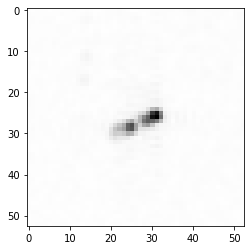

In [5]:
index = 3454
plt.imshow(data['image'][index], cmap='Greys')
print('Ship class: ' + str(data['vessel_class'][index]))

In [6]:
for i in range(10):
    veces = np.count_nonzero(data['vessel_class'] == i)
    print(f"La clase {i} ha aparecido {veces} veces")

La clase 0 ha aparecido 11163 veces
La clase 1 ha aparecido 294 veces
La clase 2 ha aparecido 288 veces
La clase 3 ha aparecido 24 veces
La clase 4 ha aparecido 63 veces
La clase 5 ha aparecido 3077 veces
La clase 6 ha aparecido 155 veces
La clase 7 ha aparecido 4025 veces
La clase 8 ha aparecido 32 veces
La clase 9 ha aparecido 135 veces


In [78]:

im.convert("RGB").save(outfile, "JPEG", quality=100)


In [17]:
vessel_classes = np.array(vessel_classes)
normalized_ship_widths = np.array(normalized_ship_widths) 
normalized_ship_lenghts = np.array(normalized_ship_lenghts)

df = pd.DataFrame(list(zip(files, vessel_classes, normalized_ship_widths,normalized_ship_lenghts )),
               columns = ["Name", "Vessel Class", "Normalized width", "Normalized lenght"])

In [18]:
df.to_csv("dataset.csv", index=False)

In [20]:
df.describe().T

,count,unique,top,freq
Name,17616,17616,Gao_ship_hh_0201608254401010020,1
Vessel Class,17616,1,0,17616
Normalized width,17616,159,0.14453125,504
Normalized lenght,17616,151,0.11328125,542


In [2]:
class vesselDataset(Dataset):
    def __init__(self):
        pass
    def __getitem__(self,index):
        pass

    def __len__(self):
        pass

In [13]:
#Clean data
directory = "D:\Python\Databases\ship_dataset_reduced"

files = os.listdir(directory)
for file in files:
        if file.endswith('.jpg'):
            files.remove(file)

for file in files:
    filename = os.path.join(directory, file)
    with open(filename, 'r') as fp:
        if len(fp.readlines())>1:
            print(file)

for file in files:
    name = file.split(".")[0]
    txt = os.path.join(directory, name+".txt")
    picture = os.path.join(directory, name+".jpg")
    os.remove(txt)
    os.remove(picture)

directory = "D:\Python\Databases\ship_dataset_reduced"
files = []
for file in os.listdir(directory):
        if file.endswith('.jpg'):
            name = file.split(".")[0]
            files.append(name)

train_folder = os.path.join(directory, "train")
test_folder = os.path.join(directory, "test")

os.mkdir(train_folder)
os.mkdir(test_folder)

for file in os.listdir(directory):
    if file.endswith('.jpg'):
        name = file.split(".")[0]
        files.append(name)

vessel_classes = []
normalized_ship_widths = []
normalized_ship_lenghts = [] 

for file in files:
    txt = os.path.join(directory, file)+".txt"
    with open(txt, 'r') as fp:
        data = fp.readline().strip().split(" ")
        vessel_classes.append(data[0])
        normalized_ship_widths.append(data[3])
        normalized_ship_lenghts.append(data[4])
    